# Exercício

O dataset utilizado neste execício é o [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries), disponibilizado em uma competição do Kaggle.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

### Faça a leitura do arquivo "Salaries.csv"

In [3]:
sal = pd.read_csv("Salaries.csv")

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Apresente algumas informações sobre o dataframe com .info()

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


### Qual a média de valores na coluna "BasePay"

In [6]:
sal['BasePay'].mean()

66325.44884050643

### Qual o maior valor da coluna "OvertimePay"

In [7]:
sal['BasePay'].max()

319275.01

### Qual o "JobTitle" de ALBERT PARDINI (EmployeeName) ? 

In [8]:
elem = sal[sal['EmployeeName'] == 'ALBERT PARDINI']['JobTitle']

In [12]:
elem

2    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

In [9]:
elem.iloc[0]

'CAPTAIN III (POLICE DEPARTMENT)'

In [9]:
elem.values[0]

'CAPTAIN III (POLICE DEPARTMENT)'

### Qual o salário de ALBERT PARDINI, incluindo os benefícios (TotalPayBenefits)?

In [15]:
emp = sal[sal['EmployeeName'] == 'ALBERT PARDINI']
emp

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [18]:
jt = emp['TotalPayBenefits']
jt.iloc[0]

335279.91

### Qual o nome da pessoa com o maior salário, incluindo os benefícios? E quem tem o menor salário?

In [19]:
emp = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]
emp['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### Qual a média salarial dos funcionários (TotalPay)? E qual a média do salário por ano?

In [20]:
sal['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [21]:
sal['TotalPay'].mean()

74768.321971703

In [22]:
all_mean = sal.groupby('Year').mean()['BasePay']
all_mean

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [23]:
all_mean = sal.groupby('Year').agg('mean')['BasePay']

In [24]:
all_mean.index

Int64Index([2011, 2012, 2013, 2014], dtype='int64', name='Year')

In [25]:
all_mean.loc[2011]

63595.956516774524

In [19]:
all_mean.iloc[0]

63595.956516774524

### Qual o desvio padrão dos salários, incluindo os benefícios?

In [21]:
sal['TotalPayBenefits'].std()

62793.53348323814

### Quantas pessoas estão dentro do intervalo de 1 desvio padrão, considerando o salário com os benefícios?

In [22]:
def is_up_to_one_std(sal, mean, std):
    lower = mean - std
    upper = mean + std
    return lower <= sal <= upper

In [23]:
std = sal['TotalPayBenefits'].std()
mean = sal['TotalPayBenefits'].mean()

sal_one_std = sal[sal['TotalPayBenefits'].apply(is_up_to_one_std, args = (mean, std))]
sal_one_std.count()['Id']

93119

========================================================

## Desafios

### O salário segue uma distribuição normal?
Dicas: A biblioteca scipy e normaltest para obter mais informações. Veja as seguintes dicas
[Dica_I](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) e 
[Dica_II](http://www.portalaction.com.br/inferencia/61-papel-de-probabilidade)

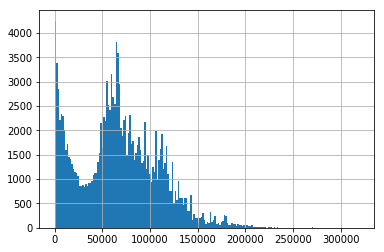

In [24]:
sal_nn = sal[sal['BasePay'].notna()]
sal_nn = sal_nn[sal_nn['BasePay'] > 0.0]
sal_nn['BasePay'].min()
#sns.boxplot(y='BasePay',data=sal_nn,palette='winter')
sal_nn['BasePay'].hist(bins=200)

### Para os campos com valores nulos, como você pensaria em tratá-los?

**Resp.:** Podemos utilizar a mediana ou aplicar alguma regra de negócio para preencher estes valores

### Você conseguiria criar uma nova variável com base nas informações existentes?

**Resp.:** Sim, é possível criar novas variáevis. Por exemplo, valores proporcionais.